In [2]:
import dgl
from dgl.nn import RelGraphConv

In [5]:
import dgl
import numpy as np
import torch
import torch as th
from dgl.nn import RelGraphConv
g = dgl.graph(([0,1,2,3,2,5], [1,2,3,4,0,3]))
feat = th.ones(6, 10)
conv = RelGraphConv(10, 2, 4, regularizer='basis', num_bases=2)
etype = th.tensor([0,1,2,0,1,2])
res = conv(g, feat, etype)
res

tensor([[ 1.7996, -1.5485],
        [ 0.1237,  0.0415],
        [ 1.7996, -1.5485],
        [ 1.5560, -1.1490],
        [ 0.1237,  0.0415],
        [ 0.6624, -0.4961]], grad_fn=<AddBackward0>)

In [7]:
import torch
from torch.nn.utils.rnn import pad_sequence
a = []
b = torch.LongTensor(a)
b.cuda()

IndexError: index 0 is out of bounds for dimension 0 with size 0

In [8]:
import pickle
convSpeakers, convInputSequence, convinputMaxSequenceLength, convActLabels, convEmotionLabels, train_conv_ids, test_conv_ids, valid_conv_ids, structure_daily, action_daily = pickle.load(open('./data/dailydialog/Daily.pkl', 'rb'))

In [10]:
convActLabels

{'tr_c9662': [2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 3, 1],
 'va_c429': [3, 0, 2, 2, 0, 2, 3, 0, 2, 2],
 'tr_c2128': [2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2],
 'te_c105': [0, 0, 2, 3, 1],
 'tr_c2927': [0, 2, 3, 1, 2, 2],
 'tr_c5195': [0, 0, 3, 0, 3, 1],
 'tr_c5864': [3, 1, 0, 3],
 'tr_c8405': [2, 3, 1, 3, 3, 1],
 'tr_c1168': [0, 2, 0, 2, 0, 2],
 'tr_c1707': [0, 2, 0, 2, 2],
 'tr_c3969': [0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3],
 'te_c196': [0, 2, 3, 1, 2],
 'tr_c4953': [0, 2, 0, 2, 0, 2, 0, 2, 2, 3, 3, 1],
 'tr_c2192': [2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2],
 'tr_c2844': [2, 2, 2, 2],
 'va_c21': [0, 3, 1, 0, 2, 0, 2, 0, 2, 0, 2],
 'tr_c5035': [2, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3],
 'te_c23': [2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2],
 'tr_c7764': [3, 0, 2, 1],
 'tr_c7147': [0, 3, 1, 0, 2, 2, 2, 2],
 'tr_c10418': [2, 2, 2, 2, 2, 2],
 'tr_c9657': [3, 1, 0, 2, 2, 2, 0, 2, 2, 0, 3, 0, 3, 0, 2, 0, 2, 3, 1, 2, 2],
 'tr_c1324': [2, 0, 2, 3, 1],
 'te_c485': [0, 0, 0, 2],
 'tr_c9250': [2, 2, 2, 0, 2, 2, 2],
 'tr_

In [11]:
from transformers import AlbertTokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [17]:
vocab = tokenizer.get_vocab()
len(vocab)
keys = vocab.keys()

In [27]:
tokenizer('happy')['input_ids'][1:-1]

[1700]

In [9]:
from dataloader import MELDDataset, DailyDialogueDataset
# meld = MELDDataset('./data/meld/MELD.pkl', 7, train=False)
daily = DailyDialogueDataset('test', './data/dailydialog/Daily.pkl')

In [10]:
from torch.utils.data import DataLoader
# train_loader = DataLoader(meld,
#                               batch_size=1,
#                               collate_fn=meld.collate_fn)
train_loader = DataLoader(daily,
                              batch_size=1,
                              collate_fn=daily.collate_fn)

In [ ]:
torch.LongTensor(self.sent_ids[vid]), \
               torch.LongTensor(self.masks[vid]), \
               torch.LongTensor(self.token_types[vid]), \
               torch.LongTensor(self.cpt_graph_isa[vid][0]), \
               torch.LongTensor(self.cpt_graph_isa[vid][1]), \
               torch.FloatTensor(self.cpt_graph_isa[vid][2]), \
               torch.LongTensor(self.cpt_graph_causes[vid][0]), \
               torch.LongTensor(self.cpt_graph_causes[vid][1]), \
               torch.FloatTensor(self.cpt_graph_causes[vid][2]), \
               torch.LongTensor(self.cpt_graph_hascnt[vid][0]), \
               torch.LongTensor(self.cpt_graph_hascnt[vid][1]), \
               torch.FloatTensor(self.cpt_graph_hascnt[vid][2]), \
               torch.FloatTensor(self.videoAudio[vid]), \
               torch.FloatTensor(self.videoSpeakers[vid]), \
               torch.FloatTensor([1] * len(self.videoLabels[vid])), \
               torch.LongTensor(self.videoLabels[vid]), \
               torch.LongTensor(self.node_src[vid]), \
               torch.LongTensor(self.node_dst[vid]), \
               torch.LongTensor(self.edge_type[vid]), \
               vid

In [7]:
for data in train_loader:
    sent_ids, masks, token_types, cpt_graph_isa_src, cpt_graph_isa_dst, cpt_graph_causes_src, cpt_graph_causes_dst, \
    cpt_graph_hascontext_src, cpt_graph_hascontext_dst, cpt_graph_isa_weight, cpt_graph_causes_weight, cpt_graph_hascontext_weight, _, speakers, _, labels, str_src, str_dst, str_edge_type, vid = data
    break

In [ ]:
torch.LongTensor(self.sent_ids[conv]), \
               torch.LongTensor(self.masks[conv]),\
               torch.LongTensor(self.token_types[conv]),\
               self.cpt_graph_isa[conv][0], \
               self.cpt_graph_isa[conv][1],\
               self.cpt_graph_causes[conv][0], \
               self.cpt_graph_causes[conv][1], \
               self.cpt_graph_hascnt[conv][0], \
               self.cpt_graph_hascnt[conv][1], \
               torch.torch.FloatTensor([[1, 0] if x == '0' else [0, 1] for x in self.Speakers[conv]]), \
               torch.FloatTensor([1] * len(self.ActLabels[conv])), \
               torch.LongTensor(self.ActLabels[conv]), \
               torch.LongTensor(self.EmotionLabels[conv]), \
               self.cpt_graph_isa[conv][2], \
               self.cpt_graph_causes[conv][2], \
               self.cpt_graph_hascnt[conv][2], \
               torch.LongTensor(self.node_src[conv]), \
               torch.LongTensor(self.node_dst[conv]), \
               torch.LongTensor(self.edge_type[conv]), \
               self.InputMaxSequenceLength[conv], \
               conv

In [11]:
for data in train_loader:
    sent_ids, masks, token_types, cpt_graph_isa_src, cpt_graph_isa_dst, cpt_graph_causes_src, cpt_graph_causes_dst, \
    cpt_graph_hascontext_src, cpt_graph_hascontext_dst, speakers, _, _, labels, cpt_graph_isa_weight, cpt_graph_causes_weight, cpt_graph_hascontext_weight, str_src, str_dst, str_edge_type, maxSequence, vid = data
    break

In [13]:
sent_ids

tensor([[[   2, 4148, 2170,  184,   50,   42,   31, 2933,   13,   22,   13,
            38,  541,   42,   26,   21,  133,    3,    0,    0]],

        [[   2,   31,   13,   22,  307, 1123,   31,   13,   22,   13,  195,
            74,   70,   16,  286,   31,  114,  330,   97,    3]],

        [[   2,  113,   46,   42,    3,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0]],

        [[   2,   31,   23,   19,   78,  305,   26,   21, 3349,    3,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0]]])

In [1]:
from transformers import AlbertTokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')


In [3]:
a=['I like watching movies', 'I want to get married', 'Tom']
b = tokenizer(a)

In [4]:
b

{'input_ids': [[2, 31, 101, 1953, 4795, 3], [2, 31, 259, 20, 164, 567, 3], [2, 2067, 3]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1]]}

In [1]:
from senticnet.senticnet import SenticNet

sn = SenticNet()
concept_info = sn.concept('love')
polarity_label = sn.polarity_label('love')
polarity_value = sn.polarity_value('love')
moodtags = sn.moodtags('love')
semantics = sn.semantics('love')
sentics = sn.sentics('love')

In [21]:
polarity_value_ = sn.polarity_value('measurement')

In [22]:
polarity_value_

'0.085'

In [23]:
a=[1,2,4]

In [1]:
import pickle
videoIDs_, videoSpeakers_, videoLabels_, videoText_, \
            videoAudio_, videoSentence_, trainVid, \
            testVid, _, structure_, action_ = pickle.load(open('./data/meld/MELD.pkl', 'rb'))

In [12]:
type(structure_[0])

list

In [18]:
map_relations={}
for dial in structure_.keys():
    for utt in structure_[dial]:
        map_relations[utt['type']] = 0

In [19]:
map_relations

{'Comment': 0,
 'Acknowledgement': 0,
 'Contrast': 0,
 'Correction': 0,
 'Question-answer_pair': 0,
 'Clarification_question': 0,
 'Continuation': 0,
 'Q-Elab': 0,
 'Elaboration': 0,
 'Alternation': 0,
 'Parallel': 0,
 'Explanation': 0,
 'Result': 0}

In [20]:
for dial in structure_.keys():
    for utt in structure_[dial]:
        map_relations[utt['type']] +=1

In [21]:
map_relations

{'Comment': 4975,
 'Acknowledgement': 1026,
 'Contrast': 188,
 'Correction': 273,
 'Question-answer_pair': 1286,
 'Clarification_question': 1730,
 'Continuation': 1809,
 'Q-Elab': 181,
 'Elaboration': 775,
 'Alternation': 20,
 'Parallel': 9,
 'Explanation': 3,
 'Result': 1}

In [22]:
percentage = {}
total = 0
for i in map_relations.keys():
    total+=map_relations[i]

In [24]:
percentage = {}
for i in map_relations.keys():
    percentage[i] = map_relations[i]/total

In [25]:
percentage

{'Comment': 0.40526230042359074,
 'Acknowledgement': 0.08357771260997067,
 'Contrast': 0.01531443466927338,
 'Correction': 0.022238514173998046,
 'Question-answer_pair': 0.10475724991854024,
 'Clarification_question': 0.14092538286086673,
 'Continuation': 0.14736070381231672,
 'Q-Elab': 0.014744216357119583,
 'Elaboration': 0.06313131313131314,
 'Alternation': 0.0016291951775822744,
 'Parallel': 0.0007331378299120235,
 'Explanation': 0.00024437927663734115,
 'Result': 8.145975887911372e-05}

In [51]:
path = '/home/maxwe11y/PycharmProjects/DialogueDiscourseParsing/data/STAC/train.json'
import json
stac_train = json.load(open(path,'rb'))
path_test = '/home/maxwe11y/PycharmProjects/DialogueDiscourseParsing/data/STAC/test.json'
stac_test = json.load(open(path_test,'rb'))
stac = stac_train+stac_test

In [52]:
stac[0]

{'id': 'pilot01',
 'edus': [{'speaker': 'Tomm', 'text': 'ello'},
  {'speaker': 'Tomm', 'text': 'Just got a connection reset'},
  {'speaker': 'Markus', 'text': "Hm, shouldn't happen"},
  {'speaker': 'Markus', 'text': "(and hasn't before)."},
  {'speaker': 'Markus', 'text': 'Let me know if you have problems.'},
  {'speaker': 'Tomm',
   'text': 'Got a SocketException error appear in this chat line'},
  {'speaker': 'Tomm', 'text': "I guess we'll see if it happens again"},
  {'speaker': 'Markus', 'text': 'Yes,'},
  {'speaker': 'Markus', 'text': 'fingers crossed.'},
  {'speaker': 'Tomm', 'text': 'I take it this is the right game to be in?'},
  {'speaker': 'Markus', 'text': 'Yes,'},
  {'speaker': 'Markus', 'text': "I don't know where the other two are."},
  {'speaker': 'Markus', 'text': "It's been very last minute ..."},
  {'speaker': 'Tomm', 'text': 'Excellent!'},
  {'speaker': 'Tomm', 'text': 'Yeah,'},
  {'speaker': 'Tomm',
   'text': "well it always feels last minute when you are getting p

In [53]:
relations = {}
for dial in stac:
    for rel in dial['relations']:
        relations[rel['type']] = 0

In [54]:
for dial in stac:
    for rel in dial['relations']:
        relations[rel['type']] +=1

In [55]:
relations

{'Continuation': 1231,
 'Explanation': 538,
 'Comment': 2118,
 'Clarification_question': 461,
 'Question-answer_pair': 3044,
 'Correction': 240,
 'Contrast': 558,
 'Acknowledgement': 1584,
 'Background': 99,
 'Result': 451,
 'Elaboration': 1078,
 'Conditional': 160,
 'Narration': 109,
 'Q-Elab': 664,
 'Parallel': 214,
 'Alternation': 142}

In [56]:
percen = {}
total = 0
for i in relations.keys():
    total+=relations[i]

In [57]:
percen = {}
for i in relations.keys():
    percen[i] = relations[i]/total

In [58]:
relations

{'Continuation': 1231,
 'Explanation': 538,
 'Comment': 2118,
 'Clarification_question': 461,
 'Question-answer_pair': 3044,
 'Correction': 240,
 'Contrast': 558,
 'Acknowledgement': 1584,
 'Background': 99,
 'Result': 451,
 'Elaboration': 1078,
 'Conditional': 160,
 'Narration': 109,
 'Q-Elab': 664,
 'Parallel': 214,
 'Alternation': 142}

In [59]:
percen

{'Continuation': 0.0969978725080766,
 'Explanation': 0.042392246473879125,
 'Comment': 0.16688992199196281,
 'Clarification_question': 0.03632495469230163,
 'Question-answer_pair': 0.23985501536521944,
 'Correction': 0.018911039319202586,
 'Contrast': 0.04396816641714601,
 'Acknowledgement': 0.12481285950673705,
 'Background': 0.007800803719171066,
 'Result': 0.03553699472066819,
 'Elaboration': 0.08494208494208494,
 'Conditional': 0.012607359546135056,
 'Narration': 0.008588763690804507,
 'Q-Elab': 0.052320542116460485,
 'Parallel': 0.01686234339295564,
 'Alternation': 0.011189031597194863}

In [1]:
import pickle
videoIDs_, videoSpeakers_, videoLabels_, videoText_, \
            videoAudio_, videoSentence_, trainVid, \
            testVid, _, structure_, action_ = pickle.load(open('./data/meld/MELD.pkl', 'rb'))

In [21]:
structure_[0]

[{'y': 1, 'x': 0, 'type': 'Comment', 'type_num': 2},
 {'y': 2, 'x': 1, 'type': 'Comment', 'type_num': 2},
 {'y': 3, 'x': 2, 'type': 'Comment', 'type_num': 2},
 {'y': 4, 'x': 3, 'type': 'Comment', 'type_num': 2},
 {'y': 5, 'x': 4, 'type': 'Comment', 'type_num': 2},
 {'y': 6, 'x': 5, 'type': 'Acknowledgement', 'type_num': 7},
 {'y': 7, 'x': 5, 'type': 'Contrast', 'type_num': 6},
 {'y': 8, 'x': 7, 'type': 'Acknowledgement', 'type_num': 7},
 {'y': 9, 'x': 8, 'type': 'Comment', 'type_num': 2},
 {'y': 10, 'x': 9, 'type': 'Correction', 'type_num': 5},
 {'y': 11, 'x': 10, 'type': 'Comment', 'type_num': 2},
 {'y': 12, 'x': 11, 'type': 'Acknowledgement', 'type_num': 7},
 {'y': 13, 'x': 12, 'type': 'Question-answer_pair', 'type_num': 4}]

This is the code block for relation simplification

In [10]:
relations = {}
for key in structure_.keys():
    for rels in structure_[key]:
        relations[rels['type']] = rels['type_num']

In [13]:
relations_revised = relations
relations

{'Comment': 2,
 'Acknowledgement': 7,
 'Contrast': 6,
 'Correction': 5,
 'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Continuation': 0,
 'Q-Elab': 13,
 'Elaboration': 10,
 'Alternation': 15,
 'Parallel': 14,
 'Explanation': 1,
 'Result': 9}

In [17]:
del relations_revised['Explanation']
del relations_revised['Result']
del relations_revised['Parallel']

In [19]:
relations_revised['Elaboration'] = 1
relations_revised['Q-Elab'] = 8
relations_revised['Alternation'] = 9
relations_revised

{'Comment': 2,
 'Acknowledgement': 7,
 'Contrast': 6,
 'Correction': 5,
 'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Continuation': 0,
 'Q-Elab': 8,
 'Elaboration': 1,
 'Alternation': 9}

In [22]:
removed_type = ['Explanation', 'Result', 'Parallel']
changed_type = ['Elaboration', 'Q-Elab', 'Alternation']
for key in structure_.keys():
    for idx, rels in enumerate(structure_[key]):
        if rels['type'] == 'Explanation':
            structure_[key][idx]['type'] = 'Elaboration'
            structure_[key][idx]['type_num'] = relations_revised['Elaboration']
        elif rels['type'] == 'Result':
            structure_[key][idx]['type'] = 'Continuation'
            structure_[key][idx]['type_num'] = relations_revised['Continuation']
        elif rels['type'] == 'Parallel':
            structure_[key][idx]['type'] = 'Continuation'
            structure_[key][idx]['type_num'] = relations_revised['Continuation']
        elif rels['type'] == 'Elaboration':
            structure_[key][idx]['type_num'] = relations_revised['Elaboration']
        elif rels['type'] == 'Q-Elab':
            structure_[key][idx]['type_num'] = relations_revised['Q-Elab']
        elif rels['type'] == 'Alternation':
            structure_[key][idx]['type_num'] = relations_revised['Alternation']

In [25]:
relations_check = {}
for key in structure_.keys():
    for rels in structure_[key]:
        relations_check[rels['type']] = rels['type_num']
relations_check

{'Comment': 2,
 'Acknowledgement': 7,
 'Contrast': 6,
 'Correction': 5,
 'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Continuation': 0,
 'Q-Elab': 8,
 'Elaboration': 1,
 'Alternation': 9}

In [1]:
printlist = [videoIDs_, videoSpeakers_, videoLabels_, videoText_,\
            videoAudio_, videoSentence_, trainVid,\
            testVid, _ , structure_, action_]
pickle.dump(printlist, open('./data/meld/MELD_revised.pkl', 'wb'))

NameError: name 'videoIDs_' is not defined

In [2]:
import pickle
videoIDs_, videoSpeakers_, videoLabels_, videoText_, \
            videoAudio_, videoSentence_, trainVid, \
            testVid, _, structure_, action_ = pickle.load(open('./data/meld/MELD_features_raw.pkl', 'rb'))

ValueError: not enough values to unpack (expected 11, got 9)

This is the code block for relation simplication

In [1]:
import pickle
Speakers_, InputSequence_, InputMaxSequenceLength_, \
        ActLabels_, EmotionLabels_, trainId, testId, validId, \
        structure_, action_ = pickle.load(open('./data/dailydialog/Daily.pkl', 'rb'))

In [2]:
len(structure_.keys())

13118

In [3]:
relations = {}
for key in structure_.keys():
    for rels in structure_[key]:
        relations[rels['type']] = rels['type_num']

In [4]:
revised_relations = relations
relations

{'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Explanation': 1,
 'Comment': 2,
 'Parallel': 14,
 'Continuation': 0,
 'Acknowledgement': 7,
 'Elaboration': 10,
 'Contrast': 6,
 'Narration': 12,
 'Result': 9,
 'Q-Elab': 13,
 'Alternation': 15,
 'Correction': 5,
 'Background': 8}

In [5]:
del revised_relations['Narration']
del revised_relations['Alternation']
del revised_relations['Correction']
del revised_relations['Background']

In [6]:
revised_relations

{'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Explanation': 1,
 'Comment': 2,
 'Parallel': 14,
 'Continuation': 0,
 'Acknowledgement': 7,
 'Elaboration': 10,
 'Contrast': 6,
 'Result': 9,
 'Q-Elab': 13}

In [7]:
relations

{'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Explanation': 1,
 'Comment': 2,
 'Parallel': 14,
 'Continuation': 0,
 'Acknowledgement': 7,
 'Elaboration': 10,
 'Contrast': 6,
 'Result': 9,
 'Q-Elab': 13}

In [8]:
revised_relations['Q-Elab'] = 5
revised_relations['Parallel'] = 8
revised_relations

{'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Explanation': 1,
 'Comment': 2,
 'Parallel': 8,
 'Continuation': 0,
 'Acknowledgement': 7,
 'Elaboration': 10,
 'Contrast': 6,
 'Result': 9,
 'Q-Elab': 5}

In [9]:
removed_type = ['Narration', 'Alternation', 'Correction', 'Background']
changed_type = ['Parallel', 'Q-Elab']
for key in structure_.keys():
    for idx, rels in enumerate(structure_[key]):
        if rels['type'] == 'Narration':
            structure_[key][idx]['type'] = 'Comment'
            structure_[key][idx]['type_num'] = revised_relations['Comment']
        elif rels['type'] == 'Alternation':
            structure_[key][idx]['type'] = 'Contrast'
            structure_[key][idx]['type_num'] = revised_relations['Contrast']
        elif rels['type'] == 'Correction':
            structure_[key][idx]['type'] = 'Comment'
            structure_[key][idx]['type_num'] = revised_relations['Comment']
        elif rels['type'] == 'Background':
            structure_[key][idx]['type'] = 'Comment'
            structure_[key][idx]['type_num'] = revised_relations['Comment']
        elif rels['type'] == 'Q-Elab':
            structure_[key][idx]['type_num'] = revised_relations['Q-Elab']
        elif rels['type'] == 'Parallel':
            structure_[key][idx]['type_num'] = revised_relations['Parallel']

In [10]:
relations_check = {}
for key in structure_.keys():
    for rels in structure_[key]:
        relations_check[rels['type']] = rels['type_num']
relations_check

{'Question-answer_pair': 4,
 'Clarification_question': 3,
 'Explanation': 1,
 'Comment': 2,
 'Parallel': 8,
 'Continuation': 0,
 'Acknowledgement': 7,
 'Elaboration': 10,
 'Contrast': 6,
 'Result': 9,
 'Q-Elab': 5}

In [11]:
printlist = [Speakers_, InputSequence_, InputMaxSequenceLength_, \
        ActLabels_, EmotionLabels_, trainId, testId, validId, \
        structure_, action_]
pickle.dump(printlist, open('./data/dailydialog/Daily_revised.pkl', 'wb'))

In [1]:
import pickle
Speakers_, InputSequence_, InputMaxSequenceLength_, \
        ActLabels_, EmotionLabels_, trainId, testId, validId, \
        structure_, action_ = pickle.load(open('./data/dailydialog/Daily_revised.pkl', 'rb'))

In [13]:
structure_['tr_c3858']

[{'y': 1, 'x': 0, 'type': 'Comment', 'type_num': 2},
 {'y': 2, 'x': 1, 'type': 'Contrast', 'type_num': 6},
 {'y': 3, 'x': 2, 'type': 'Comment', 'type_num': 2}]

In [14]:
for key in structure_.keys():
    for rels in structure_[key]:
        rel_num = rels['type_num']
        if rel_num>11:
            print(key, rel_num)

/tmp/ipykernel_119022/3361791956.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax1.plot(x, y1, 'g-', marker='o', mec='seagreen', mfc='w', label=u'MELD', linewidth=1.0, color='seagreen')
/tmp/ipykernel_119022/3361791956.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(x, y2, 'b-', marker = '*',ms=8, label=u'Emory', linewidth=1.0, color='royalblue')


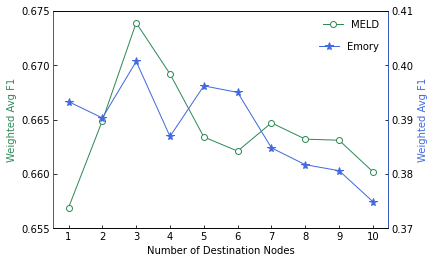

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# x轴刻度标签
x_ticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
# x轴范围（0, 1, ..., len(x_ticks)-1）
x = np.arange(len(x_ticks))
# 第1条折线数据
y1 = [0.6569, 0.6649, 0.6739, 0.6692, 0.6634, 0.6621, 0.6647, 0.6632, 0.6631, 0.6602]
# 第2条折线数据
y2 = [0.3933, 0.3903, 0.4007, 0.3869, 0.3962, 0.3950, 0.3848, 0.3817, 0.3806, 0.3749]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', marker='o', mec='seagreen', mfc='w', label=u'MELD', linewidth=1.0, color='seagreen')
ax2.plot(x, y2, 'b-', marker = '*',ms=8, label=u'Emory', linewidth=1.0, color='royalblue')

ax1.set_xlabel('Number of Destination Nodes')
ax1.set_ylabel('Weighted Avg F1', color='seagreen')
ax2.set_ylabel('Weighted Avg F1', color='royalblue')
ax1.set_yticks([0.655, 0.66, 0.665, 0.670, 0.675])
ax2.set_yticks([0.37, 0.38, 0.39, 0.40, 0.41])



ax1.legend(fontsize=10, loc='upper right',bbox_to_anchor=(0.5, 0.3, 0.5, 0.7), frameon=False)
ax2.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.5, 0.2, 0.5, 0.7), frameon=False)
plt.xticks([r for r in x], x_ticks, fontsize=10, rotation=20)

# ax1.tick_params(color='seagreen', labelcolor='seagreen')
# ax1.spines['left'].set_color('seagreen')
# for spine in ax1.spines.values():
#     spine.set_edgecolor('dimgray')
ax2.spines['left'].set_color('seagreen')
ax2.spines['right'].set_color('royalblue')
# ax2.tick_params(color='dimgray', labelcolor='royalblue')
# ax1.tick_params(color='dimgray', labelcolor='dimgray')
# for t in ax1.xaxis.get_ticklines(): t.set_color('green')
# for t in ax1.yaxis.get_ticklines(): t.set_color('green')
# for t in ax2.xaxis.get_ticklines(): t.set_color('blue')
# for t in ax2.yaxis.get_ticklines(): t.set_color('blue')

plt.savefig('./figure.pdf', bbox_inches='tight')

plt.show()